# Digit Classification Tutorial
Neural Netorks using Tensorflow 2.0  
Patrick Old

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

### Create Validation Dataset

In [6]:
x_val = x_train[:10000]
y_val = y_train[:10000]
x_train = x_train[10000:]
y_train = y_train[10000:]

### Show Image

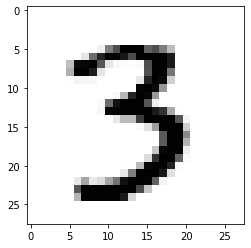

In [7]:
image_index = 0 # You may select anything up to 60,000
#print(img_names[y_train[image_index][0]]) # Print the label
plt.imshow(x_train[image_index], cmap='Greys') # Show the image

### Data Cleansing
Scaling all values to be between 0-1 for gradient descent to work properly

In [8]:
x_val = (x_val.astype('float32') / 255.0)
x_train = (x_train.astype('float32') / 255.0)
x_test = (x_test.astype('float32') / 255.0)

In [9]:
x_train.shape

(50000, 28, 28)

### Create Neural Network
Create an arbitrary sequential neural network

In [11]:
model = Sequential([
    Flatten(input_shape=[28,28]),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='tanh'),
    Dense(200, activation='tanh'),
    Dense(200, activation='tanh'),
    Dense(200, activation='tanh'),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(25, activation='relu'),
    Dense(10, activation='softmax') # Use softmax for output for classification of > 2 items
])

### View the Neural Network

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_11 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_12 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_13 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_14 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_15 (Dense)             (None, 200)              

In [13]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=['accuracy'])

In [14]:
model.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val))

Epoch 1/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7454 - accuracy: 0.7686 - val_loss: 0.2491 - val_accuracy: 0.9254
Epoch 2/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1897 - accuracy: 0.9428 - val_loss: 0.1617 - val_accuracy: 0.9517
Epoch 3/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1264 - accuracy: 0.9622 - val_loss: 0.1335 - val_accuracy: 0.9622
Epoch 4/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0935 - accuracy: 0.9726 - val_loss: 0.1570 - val_accuracy: 0.9562
Epoch 5/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0722 - accuracy: 0.9781 - val_loss: 0.1074 - val_accuracy: 0.9684
Epoch 6/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0555 - accuracy: 0.9835 - val_loss: 0.1020 - val_accuracy: 0.9701
Epoch 7/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0434 - accuracy: 0.9873 - val_loss: 0.1037 - val_accuracy:

### Check Model Accuracy
97.85% accuracy is achieved on the test dataset. Not bad with so little code.

In [15]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.1155 - accuracy: 0.9785


[0.11545068025588989, 0.9785000085830688]